In [10]:
import numpy as np

def pl_regressor():
    # Define X and y values directly instead of taking user input
    X = [500, 600, 700, 800, 900, 1000, 1200, 1500, 1800, 2000]
    y = [10, 13, 18, 22, 25, 30, 40, 55, 80, 100]
    
    degree = 3  # Set polynomial degree
    
    X = np.array(X)
    y = np.array(y)
    
    # Create polynomial features
    X_poly = np.vander(X, degree + 1, increasing=True)
    
    # Calculate polynomial coefficients
    coeffs = np.linalg.inv(X_poly.T @ X_poly) @ (X_poly.T @ y)
    
    return coeffs

coeffs = pl_regressor()
print("Polynomial coefficients:", coeffs)


Polynomial coefficients: [ 1.33307591e+01  1.62695666e+00 -5.06157770e-02  1.85708039e-03]


s

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv(r"./Employee_Salary.csv")
df

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448
...,...,...
1995,19.178575,421534.69100
1996,19.254499,430478.02650
1997,19.353369,438090.84540
1998,19.842520,482242.16080


In [5]:
# Extract features and target variable
X = df[['Years of Experience']].values  # Feature matrix (years of experience)
y = df['Salary'].values  # Target variable (salary)

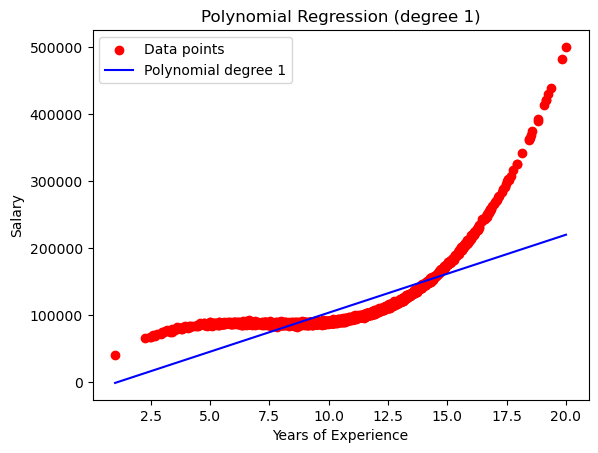

Degree 1 - Mean Squared Error: 818398373.423397


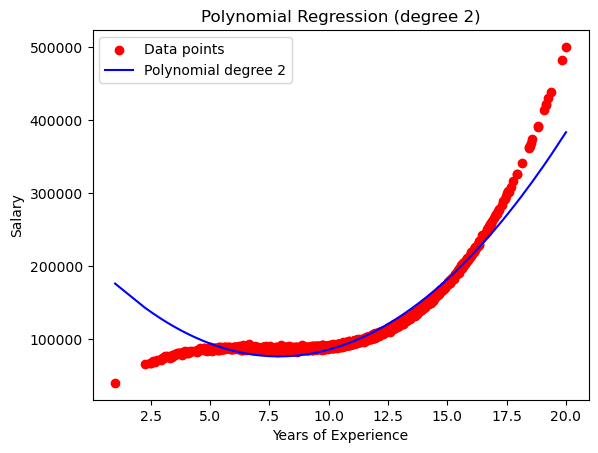

Degree 2 - Mean Squared Error: 143553900.3796636


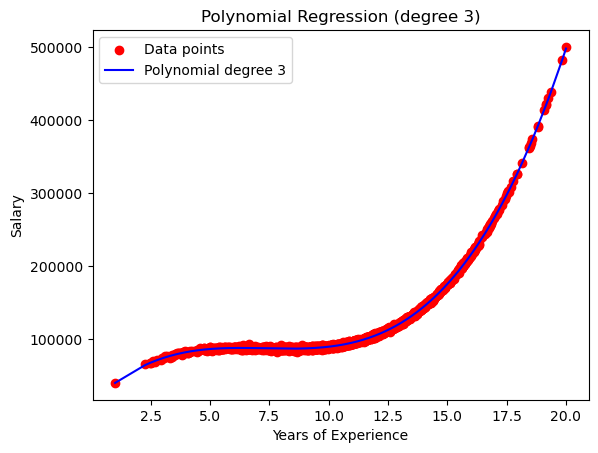

Degree 3 - Mean Squared Error: 1627265.106882953


In [7]:
def fit_and_plot_polynomial_regression(degree, X, y):
    # Create polynomial features
    polynomial_features = PolynomialFeatures(degree=degree)
    # Create a pipeline that first transforms the features and then fits the model
    model = make_pipeline(polynomial_features, LinearRegression())
    # Fit the model
    model.fit(X, y)
    # Predict
    y_pred = model.predict(X)
    # Calculate error
    mse = mean_squared_error(y, y_pred)
    # Plot
    plt.scatter(X, y, color='red', label='Data points')
    plt.plot(X, y_pred, color='blue', label=f'Polynomial degree {degree}')
    plt.title(f'Polynomial Regression (degree {degree})')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.legend()
    plt.show()
    return mse

# Compare polynomial degrees
for degree in range(1, 4):  # Example for degrees 1, 2, and 3
    mse = fit_and_plot_polynomial_regression(degree, X, y)
    print(f'Degree {degree} - Mean Squared Error: {mse}')

Degree 1 (Linear Regression):

MSE: 818,398,373.423397
A relatively high error indicates that a linear model is not capturing the relationship between years of experience and salary accurately. The salary data likely has some curvature that a simple linear model cannot account for.

Degree 2 (Quadratic Regression):

MSE: 143,553,900.3796636
The error significantly decreases when using a degree 2 polynomial, suggesting that the quadratic model fits the data much better than a linear model. This implies a curved relationship between the features (years of experience) and the target variable (salary).

Degree 3 (Cubic Regression):

MSE: 1,627,265.106882953
The error further drops drastically when using a cubic model, indicating that the cubic polynomial is capturing the trend in the data very well. This degree of flexibility seems to provide the best fit so far, as evidenced by the lowest MSE.

Conclusion:
As the degree of the polynomial increases from 1 to 3, the model becomes more complex and fits the data better, as shown by the decreasing MSE. However, while degree 3 shows the lowest error, further increasing the polynomial degree could lead to overfitting

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Read the dataset
file_path = 'employee_salary.csv'  # Replace with the path to your file
data = pd.read_csv(file_path)

# Extract X and y
X = data[['YearsExperience']].values
y = data['Salary'].values

# Degree of polynomial
degree = int(input("Enter the degree of the polynomial: "))

# Create and fit the polynomial regression model
poly_features = PolynomialFeatures(degree=degree)
model = make_pipeline(poly_features, LinearRegression())
model.fit(X, y)

# Predict values
y_pred_sklearn = model.predict(X)

print("Scikit-Learn Polynomial Regression Coefficients:", model.named_steps['linearregression'].coef_)
print("Scikit-Learn Polynomial Regression Intercept:", model.named_steps['linearregression'].intercept_)
print("Scikit-Learn Polynomial Regression Predictions:", y_pred_sklearn)